In [1]:
import psychrnn
from psychrnn.tasks import rdm as rd
from psychrnn.backend.models.basic import Basic

import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

define params globally first before passing to RDM, mess w/ model params and explain what can do. (can turn on and off dale's law). some masking, input output connectivity. train_params variables stuff

In [2]:
dt = 10 # time-step
tau = 100 # intrinsic time constant of neural state decay
T = 2000 # time to run for (number of steps is T/dt)
N_batch = 50 # number of trials per training step
N_rec = 50 # number of recurrent units
name = 'basicModel'

In [3]:
rdm = rd.RDM(dt = dt, tau = tau, T = T, N_batch = N_batch)

RDM puts the params passed in as well as other generated params into a dict we can then use to create our model. 

In [4]:
params = rdm.__dict__
print(params)

{'N_batch': 50, 'N_in': 2, 'N_out': 2, 'dt': 10, 'tau': 100, 'T': 2000, 'alpha': 0.1, 'N_steps': 200}


Generate *N_batch* trials to be used in training

In [5]:
gen = rdm.batch_generator()

We add in a few params that Basic(RNN) needs but that RDM doesn't generate for us.

In [6]:
params['name'] = name #Used to scope out a namespace for global variables.
params['N_rec'] = N_rec

There are some other optional parameters we can add in:

In [7]:
params['dale_ratio'] = None # Default: None -- when the dale_ratio is set, dale's law is applied
params['rec_noise'] = 0.0 # Default: 0.0 -- how much noise to add to the new_state calculation
params['W_in_train'] = True # Indicates whether W_in is trainable. Default: True
params['W_rec_train'] = True # Indicates whether W_rec is trainable. Default: True
params['W_out_train'] = True # Indicates whether W_out is trainable. Default: True
params['b_rec_train'] = True # Indicates whether b_rec is trainable. Default: True
params['b_out_train'] = True # Indicates whether b_out is trainable. Default: True
params['init_state_train'] = True # Indicates whether init_state is trainable. Default: True
params['load_weights_path'] = None # When given a path, loads weights from file in that path. Default: None

Instantiate our model

In [8]:
basicModel = Basic(params)

Start a tensorflow session with loss, regularization, predictions, and regularized loss defined.

In [9]:
basicModel.build()

Set the training parameters for our model. All of the parameters below are optional.

In [10]:
train_params = {}
train_params['save_weights_path'] =  '../weights/refactor_weights.npz' # Where to save the model after training. Default: None
train_params['training_iters'] = 100000 # number of iterations to train for Default: 10000
train_params['learning_rate'] = .001 # Sets learning rate if use default optimizer Default: .001
train_params['loss_epoch'] = 10 # Compute and record loss every 'loss_epoch' epochs. Default: 10
train_params['verbosity'] = True # If true, prints information as training progresses. Default: True
train_params['save_training_weights_epoch'] = 100 # save training weights every 'save_training_weights_epoch' epochs. Default: 100
train_params['training_weights_path'] = None # where to save training weights as training progresses. Default: None
train_params['generator_function'] = None # replaces trial_batch_generator with the generator_function when not none. Default: None
train_params['optimizer'] = tf.train.AdamOptimizer(learning_rate=train_params['learning_rate']) # What optimizer to use to compute gradients. Default: tf.train.AdamOptimizer(learning_rate=train_params['learning_rate'])
train_params['clip_grads'] = True # If true, clip gradients by norm 1. Default: True

Train our model.

In [11]:
basicModel.train(gen, train_params)

Iter 500, Minibatch Loss= 0.235796
Iter 1000, Minibatch Loss= 0.203117
Iter 1500, Minibatch Loss= 0.142786
Iter 2000, Minibatch Loss= 0.111439
Iter 2500, Minibatch Loss= 0.075062
Iter 3000, Minibatch Loss= 0.045138
Iter 3500, Minibatch Loss= 0.045797
Iter 4000, Minibatch Loss= 0.023030
Iter 4500, Minibatch Loss= 0.023822
Iter 5000, Minibatch Loss= 0.021730
Iter 5500, Minibatch Loss= 0.015920
Iter 6000, Minibatch Loss= 0.016599
Iter 6500, Minibatch Loss= 0.017308
Iter 7000, Minibatch Loss= 0.010207
Iter 7500, Minibatch Loss= 0.012495
Iter 8000, Minibatch Loss= 0.015862
Iter 8500, Minibatch Loss= 0.011640
Iter 9000, Minibatch Loss= 0.012663
Iter 9500, Minibatch Loss= 0.012469
Iter 10000, Minibatch Loss= 0.008194
Iter 10500, Minibatch Loss= 0.008705
Iter 11000, Minibatch Loss= 0.007904
Iter 11500, Minibatch Loss= 0.007633
Iter 12000, Minibatch Loss= 0.006312
Iter 12500, Minibatch Loss= 0.007980
Iter 13000, Minibatch Loss= 0.005879
Iter 13500, Minibatch Loss= 0.006067
Iter 14000, Minibatch

([0.23579614,
  0.20311701,
  0.1427855,
  0.11143926,
  0.07506185,
  0.045138113,
  0.045797475,
  0.023029922,
  0.023822483,
  0.02173046,
  0.015919631,
  0.016598841,
  0.017307725,
  0.010207212,
  0.0124950465,
  0.015862035,
  0.011640395,
  0.01266293,
  0.012468513,
  0.008194171,
  0.008704884,
  0.007903581,
  0.00763313,
  0.0063116224,
  0.007980002,
  0.0058789602,
  0.0060670716,
  0.005872049,
  0.005924001,
  0.005982511,
  0.006151778,
  0.005539806,
  0.0052817236,
  0.005916849,
  0.007248079,
  0.0052238577,
  0.0065675094,
  0.005192524,
  0.0046547614,
  0.005098606,
  0.0051556583,
  0.0048331455,
  0.0046827956,
  0.004728103,
  0.004446075,
  0.0047204425,
  0.0049318345,
  0.004559401,
  0.0051421532,
  0.0062571475,
  0.0044645555,
  0.0046610218,
  0.0074058166,
  0.00531154,
  0.004331724,
  0.004391045,
  0.0049919076,
  0.0045311325,
  0.0045901346,
  0.0040469156,
  0.0043323482,
  0.004267405,
  0.0044047167,
  0.00432591,
  0.0037996974,
  0.0042379

### Plot results

Extract the next trial from the generator

In [13]:
x,y,m = next(gen)

Plot the x value of the trial -- for the RDM, this includes two input neurons with different coherence.

Text(0.5, 1.0, 'Input Data')

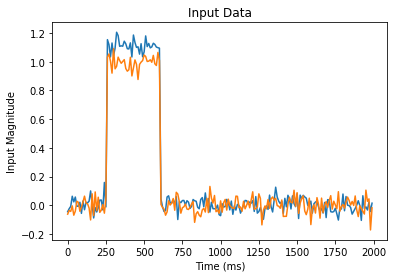

In [33]:
plt.plot(range(0, len(x[0,:,:])*dt,dt), x[0,:,:])
plt.ylabel("Input Magnitude")
plt.xlabel("Time (ms)")
plt.title("Input Data")

Run the trained model on this trial (not included in the training set).

In [22]:
results = basicModel.test(x)
output = results[0]
state_var = results[1]

Text(0.5, 1.0, 'Output on New Sample')

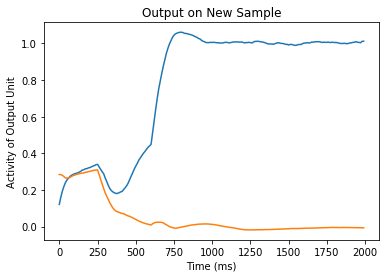

In [34]:
plt.plot(range(0, len(output[0,:,:])*dt,dt),output[0,:,:])
plt.ylabel("Activity of Output Unit")
plt.xlabel("Time (ms)")
plt.title("Output on New Sample")

Text(0.5, 1.0, 'Evolution of State Variables over Time')

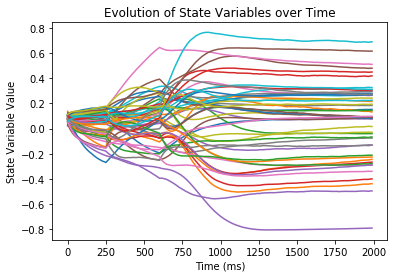

In [35]:
plt.plot(range(0, len(state_var[0,:,:])*dt,dt),state_var[0,:,:])
plt.ylabel("State Variable Value")
plt.xlabel("Time (ms)")
plt.title("Evolution of State Variables over Time")

Clean up the model to clear out the tensorflow namespace

In [15]:
basicModel.destruct()